In [1]:
import matplotlib.pyplot as plt

In [40]:
def plot_accuracy_vs_latency(labels, accuracy, latency, accuracy_label):
    plt.figure(figsize=(10, 6))
    
    plt.scatter(latency, accuracy, color='blue')
    
    for i, label in enumerate(labels):
        plt.scatter(latency[i], accuracy[i], label=label)
        
    plt.title(f'{accuracy_label} vs Samples Per Second')
    plt.xlabel('Samples Per Second')
    plt.ylabel(accuracy_label)
    
    plt.legend()
    
    plt.grid(True)
    
    fig = plt.gcf()
    ax = fig.gca()

    dark_grey = '#202020'

    # Customize the color of the ticks
    ax.tick_params(axis='x', colors=dark_grey)
    ax.tick_params(axis='y', colors=dark_grey)

    for text in ax.get_xticklabels() + ax.get_yticklabels() + [ax.xaxis.label, ax.yaxis.label, ax.title]:
        text.set_color(dark_grey)

    
    plt.savefig(f'{accuracy_label}.pdf', format='pdf', bbox_inches='tight')
    plt.show()

In [9]:
labels = [
    "No Early Exit",
    "Softmax",
    "Hidden State Saturation",
    "Last Three Top-1 Probabilities",
    "Current Hidden State Classifier",
    "Last Three Hidden States Classifier",
    "Recurrent Classifier"
]

squad_f1 = [
    88.8409,
    78.4632,
    75.9515,
    88.5642,
    86.8913,
    86.0989,
    88.5731
]

squad_exact_match = [
    81.7597,
    68.9404,
    64.9953,
    81.1164,
    78.0511,
    76.9253,
    81.3245
]

squad_samples_per_second = [
    11.036,
    18.603,
    24.917,
    8.404,
    12.941,
    11.335,
    8.655,
]

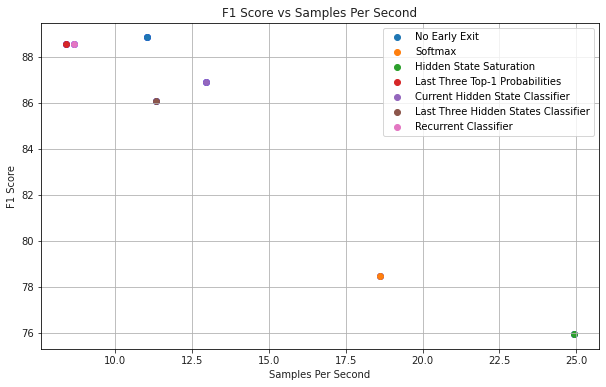

In [41]:
plot_accuracy_vs_latency(labels, squad_f1, squad_samples_per_second, 'F1 Score')

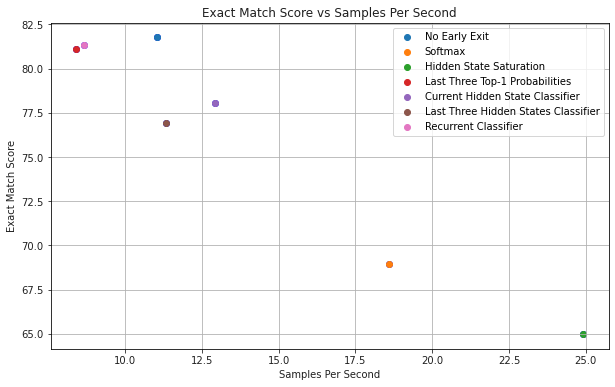

In [35]:
plot_accuracy_vs_latency(labels, squad_exact_match, squad_samples_per_second, 'Exact Match Score')

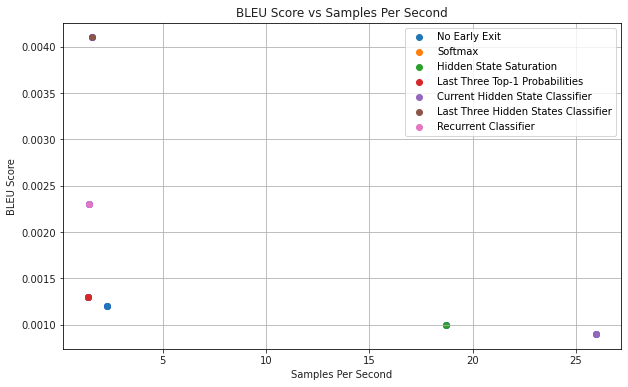

In [42]:
iwslt_bleu = [
    0.0012,
    0.0013,
    0.001,
    0.0013,
    0.0009,
    0.0041,
    0.0023,
]

iwslt_samples_per_second = [
    2.304,
    1.408,
    18.691,
    1.405,
    25.947,
    1.586,
    1.419,
]

plot_accuracy_vs_latency(labels, iwslt_bleu, iwslt_samples_per_second, 'BLEU Score')

In [28]:
cnndm_rouge1 = [
    43.7501,
    12.8757,
    3.32,
    43.4379,
    28.5158,
    40.4773,
    42.5955
]

cnndm_rouge2 = [
    21.1161,
    6.0649,
    0.0538,
    20.7069,
    11.4073,
    17.4589,
    20.3095,
]

cnndm_rougeL = [
    31.3872,
    10.3285,
    3.1352,
    31.1691,
    20.815,
    28.2757,
    30.8883,
]

cnndm_samples_per_second = [
    2.111,
    2.594,
    9.655,
    1.386,
    1.705,
    1.398,
    1.324,
]

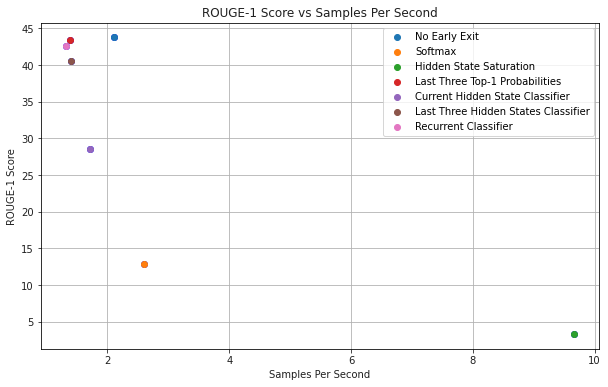

In [43]:
plot_accuracy_vs_latency(labels, cnndm_rouge1, cnndm_samples_per_second, 'ROUGE-1 Score')

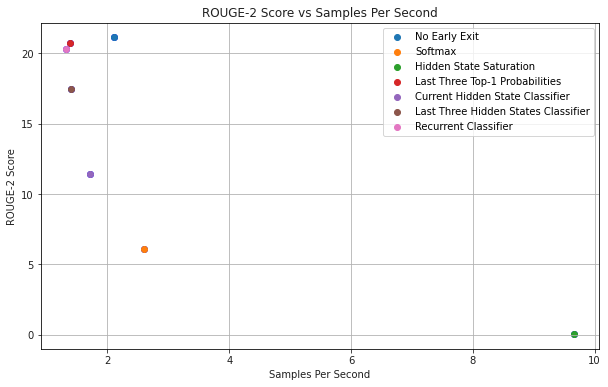

In [33]:
plot_accuracy_vs_latency(labels, cnndm_rouge2, cnndm_samples_per_second, 'ROUGE-2 Score')

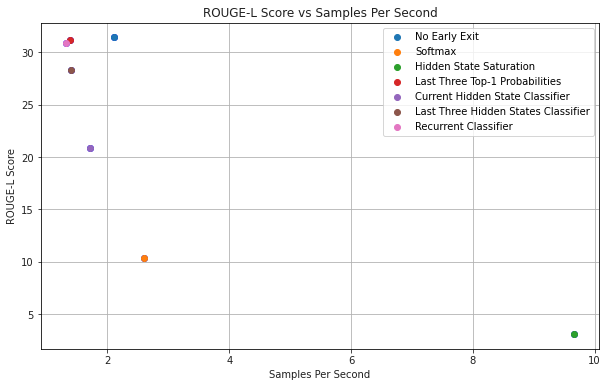

In [34]:
plot_accuracy_vs_latency(labels, cnndm_rougeL, cnndm_samples_per_second, 'ROUGE-L Score')

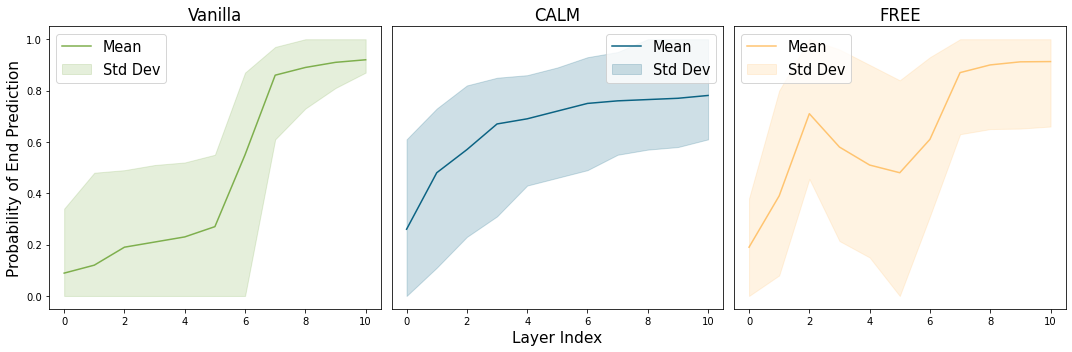

In [68]:
vanilla_lower = [0, 0, 0, 0, 0, 0, 0, 0.61, 0.73, 0.81, 0.87]
vanilla_mean = [0.089, 0.12, 0.19, 0.21, 0.23,  0.27, 0.55, 0.86, 0.89, 0.91, 0.92]
vanilla_upper = [0.34, 0.48, 0.49, 0.51, 0.52, 0.55, 0.87, 0.97, 1, 1, 1]

calm_lower = [0, 0.11, 0.23, 0.31, 0.43, 0.46, 0.49, 0.55, 0.57, 0.58, 0.61]
calm_mean = [0.26, 0.48, 0.57, 0.67, 0.69, 0.72, 0.75, 0.76, 0.765, 0.77, 0.781]
calm_upper = [0.61, 0.73, 0.82, 0.85, 0.86, 0.89, 0.93, 0.95, 1, 1, 1]

free_lower = [0, 0.08, 0.456, 0.214, 0.15, 0, 0.31, 0.63, 0.65, 0.652, 0.66]
free_mean = [0.19, 0.39, 0.71, 0.58, 0.51, 0.48, 0.61, 0.87, 0.9, 0.912, 0.913]
free_upper = [0.38, 0.8, 1, 0.96, 0.9, 0.84, 0.93, 1, 1, 1, 1]

colors = [
    '#7EAF4D',
    '#0B6383',
    '#FFC470',
]

fontsize = 22


fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# vanilla
axs[0].plot(vanilla_mean, color=colors[0], alpha=1, label='Mean')
axs[0].fill_between(range(len(vanilla_mean)), vanilla_lower, vanilla_upper, color=colors[0], alpha=0.2, label='Std Dev')
axs[0].set_title('Vanilla', fontsize=0.75*fontsize)
axs[0].set_ylabel('Probability of End Prediction', fontsize=0.7*fontsize)
axs[0].legend(fontsize=0.66*fontsize)

# calm
axs[1].plot(calm_mean, color=colors[1], alpha=1, label='Mean')
axs[1].fill_between(range(len(calm_mean)), calm_lower, calm_upper, color=colors[1], alpha=0.2, label='Std Dev')
axs[1].set_title('CALM', fontsize=0.75*fontsize)
axs[1].set_xlabel('Layer Index', fontsize=0.7*fontsize)
axs[1].set_yticks([])
axs[1].legend(fontsize=0.66*fontsize)

# free
axs[2].plot(free_mean, color=colors[2], alpha=1, label='Mean')
axs[2].fill_between(range(len(free_mean)), free_lower, free_upper, color=colors[2], alpha=0.2, label='Std Dev')
axs[2].set_title('FREE', fontsize=0.75*fontsize)
axs[2].set_yticks([])
axs[2].legend(fontsize=0.66*fontsize)

plt.tight_layout()
plt.savefig('top1_curves.pdf', format='pdf')
plt.show()